# SVR for ML-based prediction model

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
df = pd.read_csv("/content/drive/MyDrive/_MIZZOU/_Resources_KIM+AMAN/DEV/2023_DigitalTwin/OverlandP04ForSVR.csv")

In [45]:
df.head()
#len(df)

,T1_Depth,T2_Depth,T3_Depth,T1_Height_U,T2_Height_U,T3_Height_U,T1_Setback_FU,T2_Setback_FU,T3_Setback_FU,T1_Roof_Height,T2_Roof_Height,T3_Roof_Height,SolarRadiation
0,60,70,50,12,48,12,5,10,5,9,9,12,582.886839
1,70,60,50,12,36,24,10,10,10,9,12,9,655.262018
2,60,60,50,36,12,36,10,5,5,12,12,9,721.048065
3,70,60,60,36,24,12,10,10,10,9,9,9,654.008142
4,60,60,50,24,12,12,10,10,5,12,9,12,640.579075


In [46]:
#Separate IVs and DVs
X = df[['T1_Depth','T2_Depth','T3_Depth','T1_Height_U','T2_Height_U','T3_Height_U','T1_Setback_FU','T2_Setback_FU','T3_Setback_FU','T1_Roof_Height','T2_Roof_Height','T3_Roof_Height']]
y = df['SolarRadiation']

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

## Split data and Random State

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
import seaborn as sns
plt.style.use('seaborn')

In [49]:
#Split the data
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state = 400)
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=42)

In [50]:
from sklearn.svm import SVR
# Array of random_state values from 0 to 400
random_states = np.arange(start=0, stop=400)

# Initialize a list where we'll store the score of each random_state
scores = []

# Initialize search
for state in random_states:
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=state)
    svr_linear = SVR(kernel='linear',gamma='scale', C=1.0, epsilon=0.1)
    svr_linear.fit(X_train,y_train)
    scores.append(svr_linear.score(X_test, y_test))

results = pd.DataFrame({'random_state':random_states, 'score':scores})
RandomState_df = results[results['score'] == results['score'].max()]
RandomState = RandomState_df.iloc[0][0].astype(int)
print("The best Random State Value of this dataset is:", RandomState)

The best Random State Value of this dataset is: 63


## Learning Curve

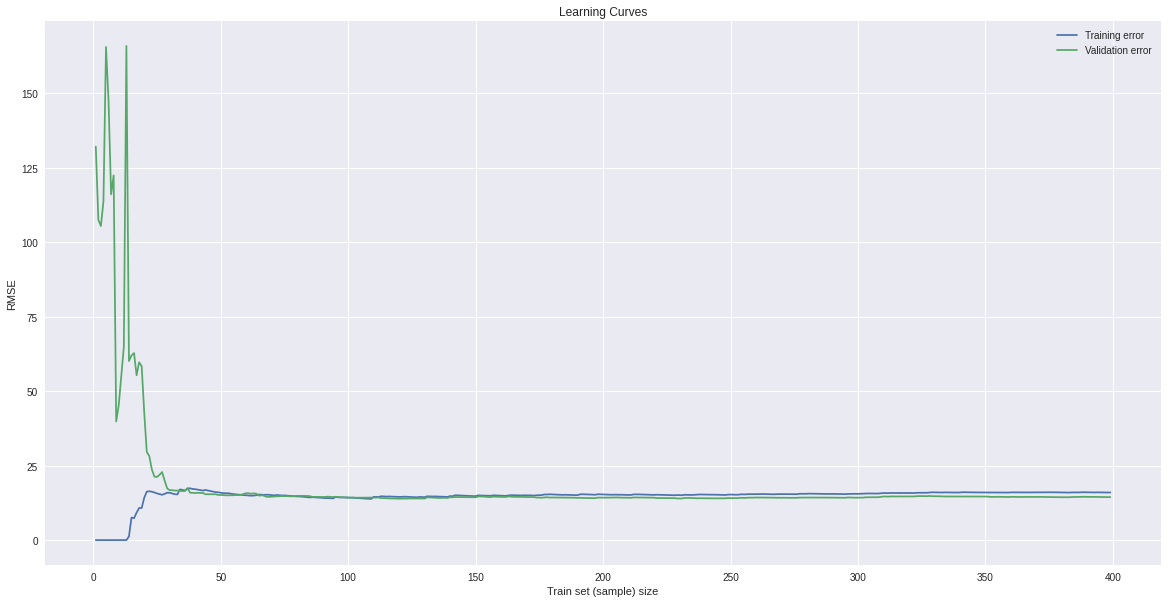

In [51]:
#Using the random state number for further learning curve and predictions
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=RandomState)

#Learning curve
# https://nvsyashwanth.github.io/machinelearningmaster/learning-curves/
regressor=LinearRegression()
regressor.fit(X_train,y_train)
predictions=regressor.predict(X_test)
plt.figure(1,figsize=(20,10))
train_errors=[]
val_errors=[]
for i in range(1,len(X_train)):
    regressor.fit(X_train[:i],y_train[:i])
    train_preds=regressor.predict(X_train[:i])
    val_preds=regressor.predict(X_test)
    train_errors.append(mse(train_preds,y_train[:i]))
    val_errors.append(mse(val_preds,y_test))
plt.plot(range(1,len(X_train)),np.sqrt(train_errors),label='Training error')
plt.plot(range(1,len(X_train)),np.sqrt(val_errors),label='Validation error')
plt.title('Learning Curves')    
plt.xlabel('Train set (sample) size')
plt.ylabel('RMSE')
plt.legend()
plt.show()

# 5/10 fold cross validation (k-fold)
## Cross-validation is usually used in machine learning for improving model prediction (c and epsion)
### We can do a grid search of hyperparameters (with 5-fold cross-validation) to see if the test/validation score be improved

Evaluating a Machine Learning model can be quite tricky. Usually, we split the data set into training and testing sets and use the training set to train the model and testing set to test the model. We then evaluate the model performance based on an error metric to determine the accuracy of the model. This method however, is not very reliable as the accuracy obtained for one test set can be very different to the accuracy obtained for a different test set. K-fold Cross Validation(CV) provides a solution to this problem by dividing the data into folds and ensuring that each fold is used as a testing set at some point. 

K-Fold CV is where a given data set is split into a K number of sections/folds where each fold is used as a testing set at some point. Lets take the scenario of 5-Fold cross validation(K=5). Here, the data set is split into 5 folds. In the first iteration, the first fold is used to test the model and the rest are used to train the model. In the second iteration, 2nd fold is used as the testing set while the rest serve as the training set. This process is repeated until each fold of the 5 folds have been used as the testing set.

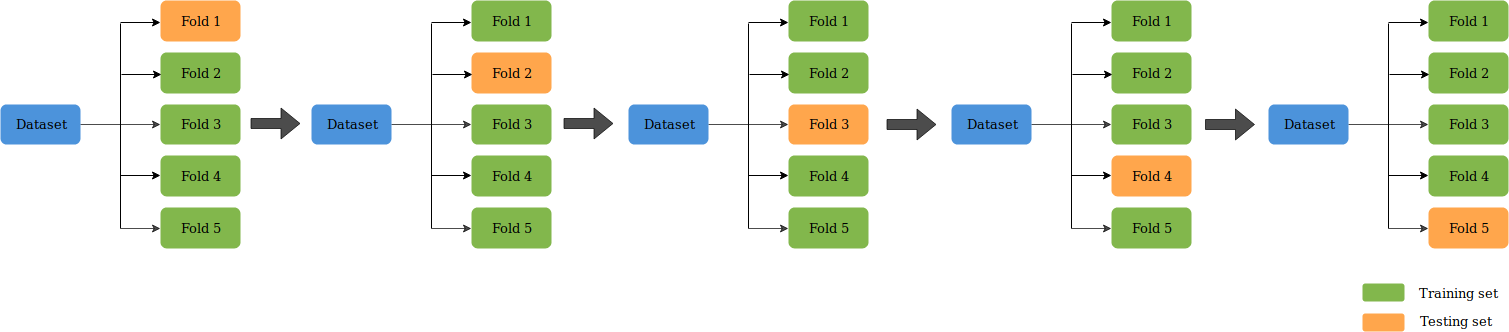

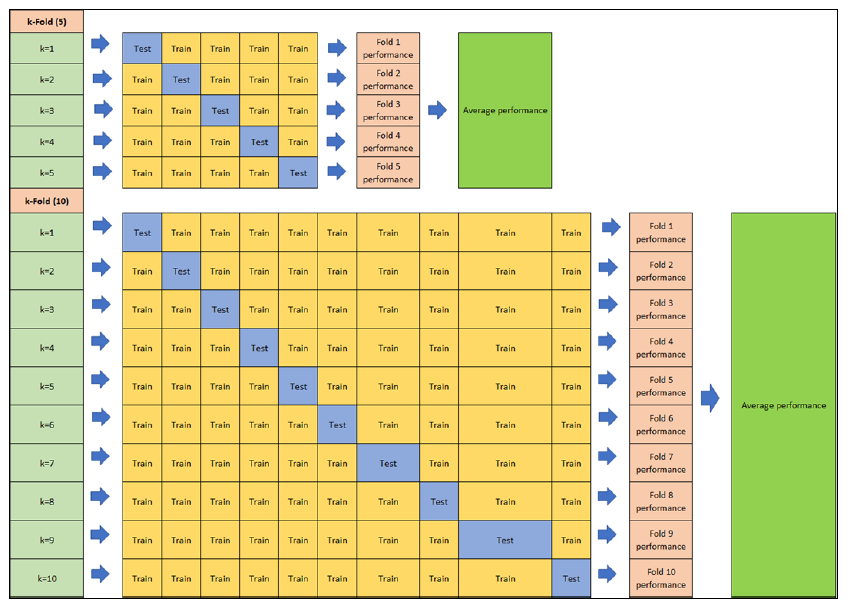

In [52]:
# https://github.com/amanjayedi/Machine-Learning-with-Python/blob/master/Regression/Support%20Vector%20Regression.ipynb
# https://medium.datadriveninvestor.com/k-fold-cross-validation-6b8518070833
# https://scikit-learn.org/stable/modules/cross_validation.html
# https://www.statology.org/k-fold-cross-validation/

In [53]:
from sklearn.model_selection import GridSearchCV
params = {'C':[0.01,0.05,0.1,0.5,1,2,5],'epsilon':[0.1,0.2,0.3,0.4,0.5,1]}

In [54]:
#Selecting the kernel
svr_linear = SVR(kernel='linear')
#Select the folds (c) 
grid = GridSearchCV(svr_linear,param_grid=params,cv=10,scoring='r2',verbose=1,return_train_score=True)
grid.fit(X_train,np.ravel(y_train,order="c"))

Fitting 10 folds for each of 42 candidates, totalling 420 fits


GridSearchCV(cv=10, estimator=SVR(kernel='linear'),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 2, 5],
                         'epsilon': [0.1, 0.2, 0.3, 0.4, 0.5, 1]},
             return_train_score=True, scoring='r2', verbose=1)

In [55]:
# Check which was deemed best estimator by the grid search
grid.best_estimator_

SVR(C=0.1, epsilon=1, kernel='linear')

In [56]:
#Fit that estimator to the data
svr_best=SVR(kernel='linear',gamma='scale', C=0.1, epsilon=1)
svr_best.fit(X_train,np.ravel(y_train,order="c"))

SVR(C=0.1, epsilon=1, kernel='linear')

In [57]:
svr_best.score(X_test,y_test)

0.9738834732482482

In [58]:
from sklearn.metrics import mean_squared_error 
print("RMSE for Linear kernelized SVR:",np.sqrt(mean_squared_error(y_test,svr_best.predict(X_test))))

#R-squared is a relative measure of fit, RMSE is an absolute measure of fit. RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction.
#result suggests that the data is bad fit. RMSE is too high
#Try to play with other input variables (adding variables is the main problem?), and compare your RMSE values. The smaller the RMSE value, the better the model.

RMSE for Linear kernelized SVR: 13.67697934720535


# Final Prediction
### Use the random state, c and epsilon got from K-fold to improve the prediction result

In [59]:
y_train = y_train.values.astype(float)
y_train = y_train.reshape(-1,1)

In [60]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X_train)
y = sc_y.fit_transform(y_train)

### ML-based prediction model

In [61]:
from sklearn.svm import SVR
import joblib

#automatically selecting c and epsilon
svr_linear = SVR(kernel='linear',gamma='scale', C=.1, epsilon=1)
#svr_linear.fit(X_train, y_train) 
svr_linear.fit(X_train,np.ravel(y_train,order="c"))

filename = "/content/drive/MyDrive/_MIZZOU/_Resources_KIM+AMAN/DEV/2023_DigitalTwin/SVM_model.joblib"
joblib.dump(svr_linear, filename)

['/content/drive/MyDrive/_MIZZOU/_Resources_KIM+AMAN/DEV/2023_DigitalTwin/SVM_model.joblib']

In [62]:
#Import prediction model
prediction_model = joblib.load(filename)
prediction_model

SVR(C=0.1, epsilon=1, kernel='linear')

## Validation

In [63]:
#rerun the prediction after getting the new c and epsilon values
y_pred = prediction_model.predict(X_test)
WriteData = pd.DataFrame({'Physics-based Modeling Results in btu/hr-ft2':y_test, 'Machine Learning-based Modeling Results in btu/hr-ft2':y_pred})
print(WriteData)

     Physics-based Modeling Results in btu/hr-ft2  \
103                                    810.185269   
219                                    640.697367   
422                                    546.835018   
111                                    668.548105   
373                                    574.176018   
..                                            ...   
471                                    564.529206   
21                                     782.838699   
484                                    553.325693   
109                                    581.421159   
370                                    782.404844   

     Machine Learning-based Modeling Results in btu/hr-ft2  
103                                         814.441619      
219                                         634.505516      
422                                         549.676625      
111                                         675.286845      
373                                         590.434025    

In [64]:
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
R_square = metrics.r2_score(y_test, y_pred)
# Printing the metrics
print('R2 square:',R_square)
print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)

R2 square: 0.9738834732482482
MAE:  10.698025747918415
MSE:  187.05976406388166
RMSE:  13.67697934720535


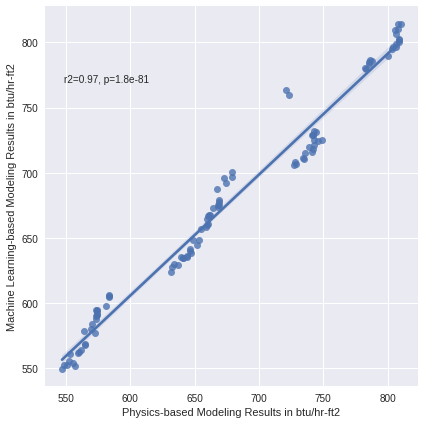

In [65]:
#Plot
import seaborn as sns
import scipy as sp

#tips = sns.load_dataset('tips')
# g = sns.lmplot(x='Real Values', y='Predicted Values', data=df, row='sex',
#                col='time', height=3, aspect=1)

g = sns.lmplot(x='Physics-based Modeling Results in btu/hr-ft2', y='Machine Learning-based Modeling Results in btu/hr-ft2', data=WriteData, height=6, aspect=1)

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['Physics-based Modeling Results in btu/hr-ft2'], data['Machine Learning-based Modeling Results in btu/hr-ft2'])
    ax = plt.gca()
    ax.text(.05, .8, 'r2={:.2f}, p={:.2g}'.format(R_square, p),
            transform=ax.transAxes)
    
g.map_dataframe(annotate)
plt.show()

## Import the real-time parameters for prediction

In [66]:
DataForPrediction = pd.read_csv("/content/drive/MyDrive/_MIZZOU/_Resources_KIM+AMAN/DEV/2023_DigitalTwin/PredictionModelData.csv")
DataForPrediction

,T1_Depth,T2_Depth,T3_Depth,T1_Height_U,T2_Height_U,T3_Height_U,T1_Setback_FU,T2_Setback_FU,T3_Setback_FU,T1_Roof_Height,T2_Roof_Height,T3_Roof_Height
0,70,70,50,24,48,12,5,10,5,9,9,12


In [67]:
#Prediction using ML-based prediction model
prediction_realtime = prediction_model.predict(DataForPrediction)
prediction_realtime

array([598.8294579])

# Write the data into csv file

In [70]:
WriteData_prediction = pd.DataFrame({'Prediction Results in btu/hr-ft2':prediction_realtime})
print(WriteData_prediction)
#export the data in csv
WriteData_prediction.to_csv('/content/drive/MyDrive/_MIZZOU/_Resources_KIM+AMAN/DEV/2023_DigitalTwin/Prediction_realtime.csv', encoding='utf-8')

   Prediction Results in btu/hr-ft2
0                        598.829458
